# Exam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## 1. Numpy basics

### Outer product

Find the outer product of the following two vectors
```
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

- Using the function outer in numpy
- Using a nested for loop or list comprehension
- Using numpy broadcasting operatoins

In [2]:
# 1
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v))

# 2
print(np.array([[ u[i]*v[j] for j in range(len(v))] for i in range(len(u))]))

# 3
print(np.reshape(u, (len(u),1)) * v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


## 2. BASH

The following tasks needs to be implemented in a script. They script needs first to be tested by running it on a terminal; the script's content must then be copied in the cell below

* Download a file named `data.csv` from [here](https://www.dropbox.com/scl/fi/kziuw2cw2ag1awqil0te3/data.csv?rlkey=qx5i8732ekl6japbmrp6675q9&dl=0). Make a copy of that file  removing the metadata and the commas between numbers; call it `data.txt`
* How many even numbers are there?
* Distinguish the entries on the basis of `sqrt(X^2 + Y^2 + Z^2)` is greater or smaller than `100*sqrt(3)/2`. Count the entries of each of the two groups 
* Make `n` copies of data.txt (with `n` an input parameter of the script), where the i-th copy has all the numbers divided by i (with `1<=i<=n`)


```bash


# 1
# download file
wget -nv https://www.dropbox.com/scl/fi/kziuw2cw2ag1awqil0te3/data.csv?rlkey=qx5i8732ekl6japbmrp6675q9&dl=0

# rename file
mv data.csv?rlkey=qx5i8732ekl6japbmrp6675q9 ./data.csv

# I pick the rows without # in it, I pass the output to sed and with it I replace commas with no characters. Then I save the result in data.txt
grep -v "#" data.csv | sed -e "s/,//g" > data.txt


# 4
if [ -z $1 ]
then
    echo "An input is needed to copy the file data.txt"
    exit
else
    n=$1
    for (( i=1; i<=$n; i++ )); do
        cp ./data.txt "./data_copy_$i.txt"
        echo "Copied data.txt as file data_copy_$i.txt"
    done
fi


```

## 3. Visualization

### Profile plot

Produce a profile plot from a scatter plot.

Download the following dataset:

```wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy```

and load it as a pandas dataframe.

Note that you should use the ```np.load()``` function to load the file as a numpy array, call the ```.item()``` method, and then pass it to the ```pd.DataFrame()``` constructor.

- Inspect the dataset, you'll find two variables (features).
- Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
- Perform a linear regression of "residuals" versus "distances" using ```scipy.stats.linregress()```.
- Plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot.
- Fill 3 numpy arrays:
 - ```x```, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins).
 - ```y```, the mean values of the "residuals", estimated in slices (bins) of "distance".
 - ```erry```, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance".

- Plot the profile plot on top of the scatter plot.

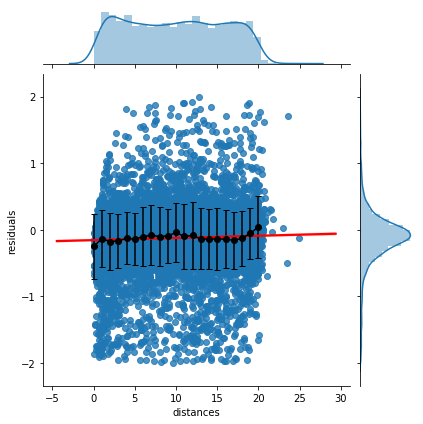

In [3]:
import seaborn as sns

# 1
df = pd.DataFrame( np.load("residuals_261.npy").item() )

# 2
df_clean = df[np.abs(df["residuals"])<2]
residuals, distances = df_clean["residuals"], df_clean["distances"]

# 3
out = stats.linregress(distances, residuals)
slope, intercept = out.slope, out.intercept

# 4
sns.jointplot(data=df_clean, x="distances", y="residuals", kind="reg", line_kws={"color": "red"})

# 5
x = np.arange(0, 21, 1)
y = []
erry = []
for xi in x:
    res = df_clean[(df_clean["distances"]>=xi) & (df_clean["distances"]<xi+1)]["residuals"]
    y.append(res.mean())
    erry.append(np.std(res))
plt.errorbar(x, y, yerr=erry, color="k", marker="o", capsize=3)
plt.show()

## 4. Algorithms

### FFT of an image

Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
- Load the image using `pylab.imread()`.
- Find and use the 2-D FFT function in `scipy.fftpack`, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
- The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
- Apply the inverse Fourier transform to see the resulting image.

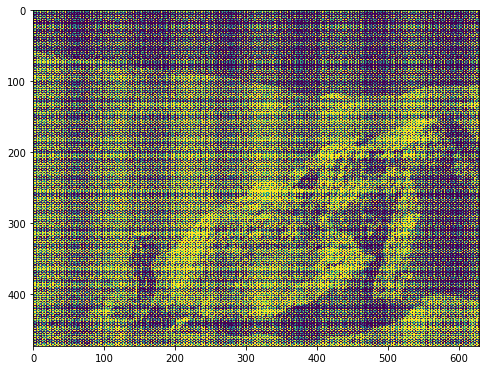

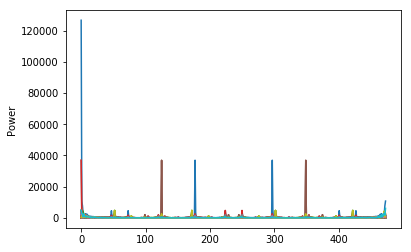

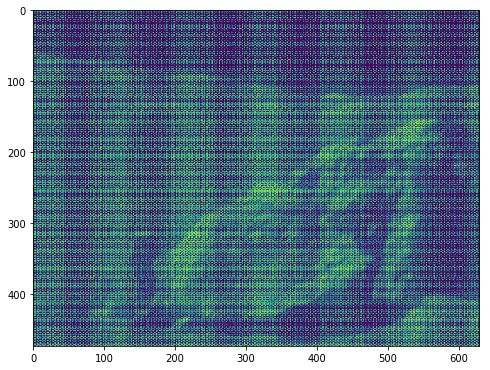

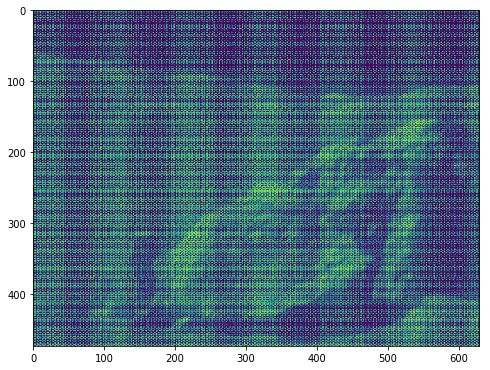

In [4]:
import pylab
from scipy.fftpack import fft2, ifft2

# 1
img = pylab.imread("moonlanding.png")
plt.figure(figsize=(8,8))
plt.imshow(np.abs(img))
plt.show()

# 2
img_fft = fft2(img)
# the result has complex numbers, so I convert it to real numbers
power = np.abs(img_fft)
plt.plot(power)
plt.ylabel("Power")
plt.show()

# 3-4
# method 1
accettable_power = int(np.percentile(power, 95))
img_fft[power<accettable_power] = 0
filtered_img = np.abs(ifft2(img_fft))
plt.figure(figsize=(8,8))
plt.imshow(filtered_img)
plt.show()

# method 2
mask = np.ones_like(img_fft)
rows, cols = mask.shape
mask[int(0.1*rows):int(0.9*rows),int(0.1*cols):int(0.9*cols)]
new_img_fft = mask * img_fft
filtered_img = np.abs(ifft2(new_img_fft))
plt.figure(figsize=(8,8))
plt.imshow(filtered_img)
plt.show()

## 5. Monte Carlo

### Monte Carlo integration in high dimension

- Start of by computing the area of a circle of unit radius, by integrating the function
 $$ f(x,y) = \begin{cases}
                        1 \,\,\,\,\text{if $x^2+y^2\le 1$} \\
                        0 \,\,\,\,\text{elsewhere}
                    \end{cases}
 $$
- Generalize the result for a 10D sphere

In [5]:
def f(x):
    return np.sum(x**2, axis=0)

# already generalized for the case of N dimensions
dim = 10
n_points = 10000
a, b = -1, 1
x = np.random.uniform(a,b,(dim,n_points))
x_sphere = x[:,f(x)<=1]

k = x_sphere.shape[1]
cube_vol = (b-a)**dim
I = cube_vol * k / n_points
print(f"Volume of sphere in {dim} dimensions: {I}")

if dim == 2:
    plt.figure(figsize=(8,8))
    plt.scatter(*x_sphere, alpha=.5, label="sphere points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

Volume of sphere in 10 dimensions: 2.7648
